In [2]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

#stop warnings
pd.options.mode.chained_assignment = None  # default='warn'


# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt


df = pd.read_csv("Titanic.csv")
print(df.shape)

df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Cleaning data to make it usable
 #Starting with checking for missiing data

Number of people Survived: 342, Number of people diseased 549 out of 891 passangerd aboard Titanic
Thats 38.38383838383838 % people who survived the cruize


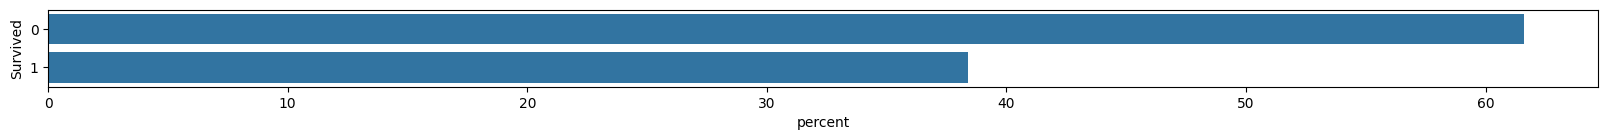

In [3]:
#Looking at how many people survived
survived = df.Survived[df['Survived'] > 0].count()
deceased = df.Survived[df['Survived'] < 1].count()
total_pasangers = df.Survived[df['Survived']].count()
print(f"Number of people Survived: {survived}, Number of people diseased {deceased} out of {total_pasangers} passangerd aboard Titanic")
print(f"Thats {(survived/total_pasangers)*100} % people who survived the cruize")
#People that survuved by percent
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=df, stat="percent");


Sex
female    314
male      577
dtype: int64
      Sex  Survived
0  female  0.742038
1    male  0.188908


<Axes: xlabel='Sex', ylabel='Survived'>

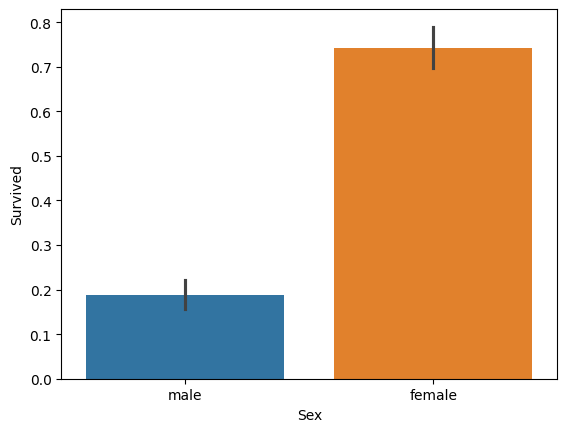

In [21]:
#comparing between male and female survival
total_sex= df.groupby('Sex').size()
print(total_sex)
#percentage of men/women that survived
men_per = df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()
print(men_per)

#People that survived
sns.set_color_codes("pastel")
sns.barplot(x="Sex", y="Survived", data=df, hue="Sex")



Looks like 74% of the women survived probably because its usiually women and children first

In [39]:
#Passangers based on Priority class(Pclass)
priority_Class= df.groupby('Pclass').size()
print(priority_Class)
#sns.barplot(x="Pclass", y="PassengerId", hue="Pclass", data=df)

#sns.histplot(df['Pclass'],binwidth=0.1,kde = False)


Pclass
1    216
2    184
3    491
dtype: int64


Looks like majority of the people are in class 3, probably becaused its the cheapest tickets

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550


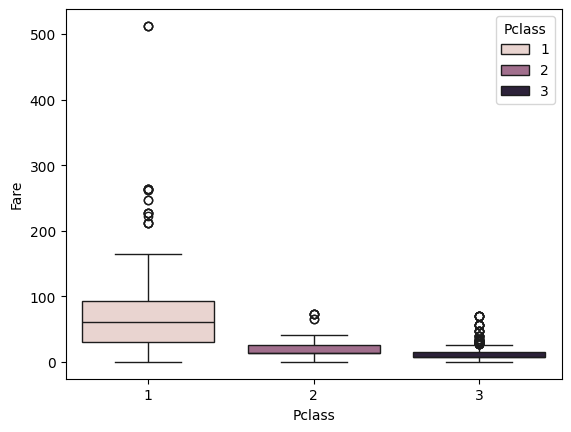

In [51]:
class_avg_Cost = df[['Pclass', 'Fare']].groupby('Pclass', as_index=False).mean()
print(class_avg_Cost)
#sb.swarmplot(x="species", y="petal_length", data=df)
sns.boxplot(x="Pclass", y="Fare", hue="Pclass", data=df)
plt.show()


Looks like, on average, the costs of the suit classes differ considerable with 1st class having highest cost, followed by 2nd class and 3rd class which is the cheapest

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


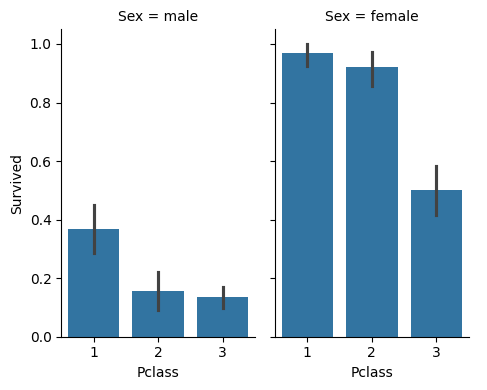

In [57]:
#Checking based on Pclass, what the survival rate is
class_avg_Survival = df[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean()
print(class_avg_Survival)

sns.catplot(
    data=df, x="Pclass", y="Survived", col="Sex",
    kind="bar", height=4, aspect=.6
)

Looking at the data above, the survival rate is highest for people with 1st Priority, followed by 2nd class and 3rd class which is the lowest survival

******CLEANING THE DATASET***********

In [10]:
#checking missing data
check_missing_data = df.isnull().sum()
check_missing_data[0:14]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Looks like data is missing from Age, Cabin and Embarked columns. Lets work on Embarked column, First we will replace the data to something meaning full. Then we will delete the 2 rows that has missing data, since it has minimal damage to the dataset.

In [12]:
#there are 3 locations where travelers Embarked from:  Southampton(s), Cherbourg(c), and Queenstown(q)
#lets confirm this
pd.unique(df['Embarked'])

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
#lets change the initials to names for the Embarked location to make it more human readable
df['Embarked'] = df['Embarked'].str.replace('S','Southampton')
df['Embarked'] = df['Embarked'].str.replace('C','Cherbourg')
df['Embarked'] = df['Embarked'].str.replace('Q','Queenstown')
pd.unique(df['Embarked'])
#since there are only 2 values in Embark that have null values we can remove them


array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [14]:
#lets work on the null values in the Embarked column.
is_null_rows= df[df.isnull().any(axis=1)]
null_rows = df.loc[df['Embarked'].isnull()]
#checking which rows have null values from Embarked since there are only 2
print(null_rows)

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


In [23]:
#creating a new dataset to work with instead of working on the original and removing the rows with null in Embarked column
df2 = df.dropna(axis= 0, subset=['Embarked'])
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Since it is not possible to guess the age, lets update the null values , since Age in MAR we can fill the missing values with the mean

In [24]:
age_mean = int(df2['Age'].mean())
print(age_mean)

29


In [25]:
df2['Age']= df2['Age'].fillna(age_mean)
#checking missing data
df2.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Now its time to update the Cabin data, we can either replace missing data with mode, which would be the most similar values. We will do this per Priority Class data since i think the survival rate is connected to the location of the passangers.

In [27]:
df2['Cabin']= df2['Cabin'].fillna(df2['Cabin'].mode()[0])
#Confirming if null values are filled
df2.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now the data is usable to processes..